In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import logging
logging.getLogger('matplotlib.font_manager').disable = True

credit = pd.read_csv("credit_card.csv")
credit.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [2]:
print("data null \n", credit.isnull().sum())
print("-------------------------------")
print("data kosong \n", credit.empty)
print("-------------------------------")
print("data nan \n", credit.isna().sum())
print("-------------------------------")

data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
-------------------------------
data kosong 
 False
-------------------------------
data nan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
-------------------------------


In [15]:
df_credit = credit.drop(['Customer Key', 'Sl_No'], axis=1)
df_credit.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
5,20000,3,0,1,8
6,100000,5,0,11,2
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7


<Axes: >

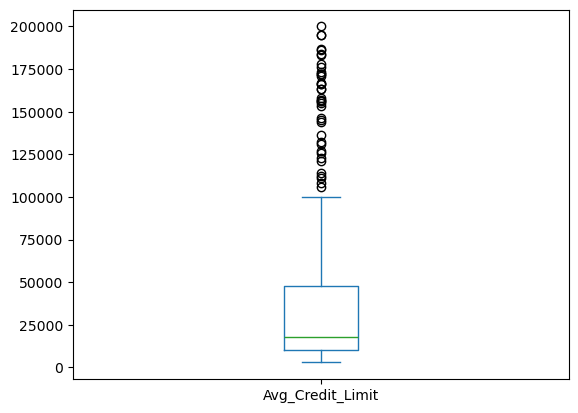

In [16]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

Jumlah data DataFrame sebelum dibuang outlier 660
Jumlah data DataFrame sesudah dibuang outlier 621


<Axes: >

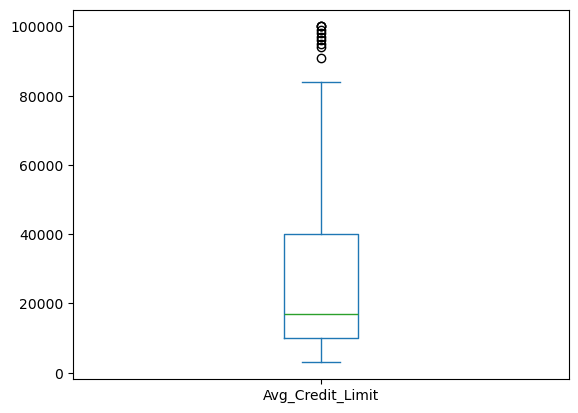

In [19]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(df_in, col_name):
    if is_numeric_dtype(df_in[col_name]):
        q1 = df_in[col_name].quantile(0.25)
        q3 = df_in[col_name].quantile(0.75)

        iqr = q3-q1
        batas_atas = q3 + (1.5 * iqr)
        batas_bawah = q1 - (1.5 * iqr)

        df_out = df_in.loc[(df_in[col_name] >= batas_bawah) & (df_in[col_name] <= batas_atas)]
    return df_out

df_bersih = remove_outlier(df_credit, "Avg_Credit_Limit")
print("Jumlah data DataFrame sebelum dibuang outlier", df_credit.shape[0])
print("Jumlah data DataFrame sesudah dibuang outlier", df_bersih.shape[0])
df_bersih['Avg_Credit_Limit'].plot(kind='box')

# plt.gca().invert_yaxis()
# plt.show()

In [22]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer

kMeansC = KMeans(random_state=0)
vis = KElbowVisualizer(kMeansC, k=(2,11))
vis.fit(df_bersih)

vis.show()

ModuleNotFoundError: No module named 'yellowbrick'